### Task - 2

##### Unsupervised Learning Classification
Name: NITHISH KUMAR B

Task - Make clusters of class  by using unsupervised machine learning algorithm

### IMPORTING LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Iris.csv')

droping label and Id column

In [2]:
df = df.drop(columns = ['Id','Species'],axis = 1)

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### SHAPE AND COLUMNS

In [4]:
df.shape

(150, 4)

In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

### Check for null values

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

### Statistical info

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### correlation

In [8]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


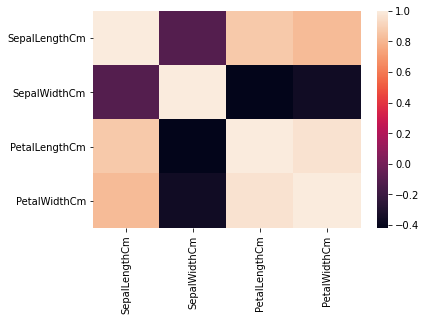

In [9]:
sns.heatmap(df.corr())

### Elbow Meathod

In [10]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i,)
    km.fit(df)
    sse  += [km.inertia_]

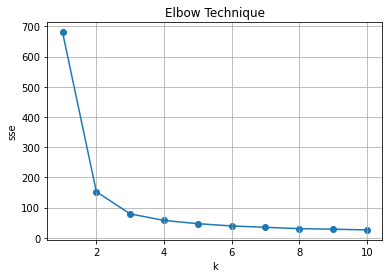

In [11]:
plt.plot(range(1,11),sse)
plt.scatter(range(1,11),sse)
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Technique')
plt.grid(True)
plt.show()

here we conclude that the value of k is 3

Clustering using Kmeans

In [12]:
km = KMeans(n_clusters=3)
pred = km.fit_predict(df)

In [13]:
df['Label'] = pred

### Centroids

In [14]:
center = km.cluster_centers_
center

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Ploting Center  

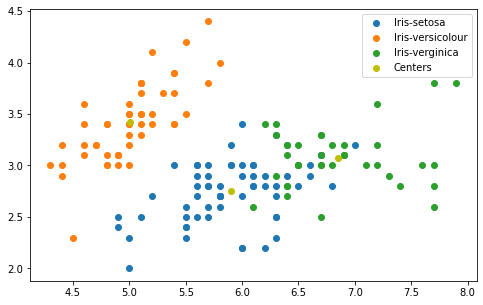

In [15]:
fig = plt.figure(figsize=(8,5))
plt.scatter(df[df['Label']==0]['SepalLengthCm'],df[df['Label']==0]['SepalWidthCm'],label = 'Iris-setosa')
plt.scatter(df[df['Label']==1]['SepalLengthCm'],df[df['Label']==1]['SepalWidthCm'],label = 'Iris-versicolour')
plt.scatter(df[df['Label']==2]['SepalLengthCm'],df[df['Label']==2]['SepalWidthCm'],label = 'Iris-verginica')
plt.scatter(center[:, 0],center[:,1],label = 'Centers',color = 'y')
plt.legend()

# Thank you